In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("breast.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [ ]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
encoded_data = pd.get_dummies(df, columns=['Race ','Marital Status', 'T Stage ','N Stage','6th Stage','Grade', 'A Stage','Estrogen Status','Progesterone Status'], drop_first=True)
encoded_data['Status'] = LabelEncoder().fit_transform(encoded_data['Status'])
X = encoded_data.drop(columns='Status', axis=1)
Y = encoded_data['Status']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
cl = Sequential()
cl.add(Dense(16, kernel_initializer='he_uniform', activation='relu', input_dim=X.shape[1]))
cl.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
cl.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
cl.add(Dense(128, kernel_initializer='he_uniform', activation='relu'))
cl.add(Dense(1, kernel_initializer='glorot_uniform', activation='sigmoid'))
cl.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.00001)

In [ ]:
model = cl.fit(X_train, Y_train, validation_split=0.3, batch_size=10, epochs=100, callbacks=[early_stopping, reduce_lr])

Epoch 1/100
226/226 [==============================] - 3s 5ms/step - loss: 0.3929 - accuracy: 0.8495 - val_loss: 0.3364 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 0.3229 - accuracy: 0.8717 - val_loss: 0.3426 - val_accuracy: 0.8602 - lr: 0.0010
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.3006 - accuracy: 0.8797 - val_loss: 0.3177 - val_accuracy: 0.8758 - lr: 0.0010
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 0.2803 - accuracy: 0.8904 - val_loss: 0.2998 - val_accuracy: 0.8851 - lr: 0.0010
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 0.2612 - accuracy: 0.8944 - val_loss: 0.3087 - val_accuracy: 0.8861 - lr: 0.0010
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.2533 - accuracy: 0.8984 - val_loss: 0.3191 - val_accuracy: 0.8872 - lr: 0.0010
Epoch 7/100
226/226 [==============================] - 1s 3ms/st

In [ ]:
y_pred = cl.predict(X_test)
y_pred = (y_pred > 0.5)

26/26 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
cm = confusion_matrix(Y_test, y_pred)
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='binary')
recall = recall_score(Y_test, y_pred, average='binary')
f1 = f1_score(Y_test, y_pred, average='binary')

print("Confusion Matrix:")
print(cm)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
[[645  22]
 [ 92  46]]
Accuracy: 0.8583850931677018
Precision: 0.6764705882352942
Recall: 0.3333333333333333
F1 Score: 0.44660194174757284


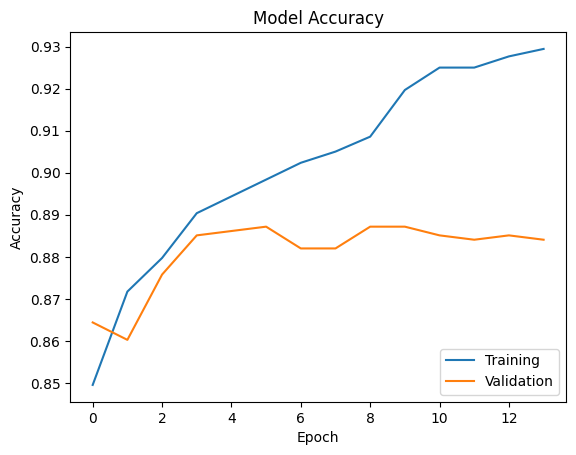

In [ ]:
# Plot the Model Accuracy and Loss
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

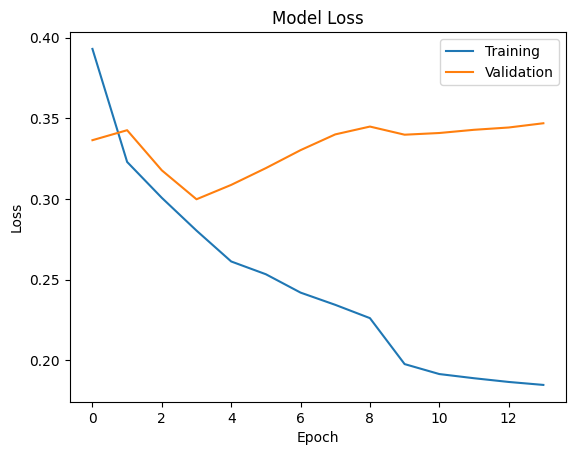

In [ ]:
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [ ]:
cl.save("breast_cancer_model.h5")

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("breast_cancer_model.h5")
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 16)                432       
                                                                 
 dense_6 (Dense)             (None, 32)                544       
                                                                 
 dense_7 (Dense)             (None, 64)                2112      
                                                                 
 dense_8 (Dense)             (None, 128)               8320      
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,537
Trainable params: 11,537
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
cl = load_model("breast_cancer_model.h5")

In [ ]:
# Load and preprocess the data
from tensorflow.keras.models import load_model

df = pd.read_csv("breast.csv")
df.isnull().sum()

# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

encoded_data = pd.get_dummies(df, columns=['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status'], drop_first=True)
encoded_data['Status'] = LabelEncoder().fit_transform(encoded_data['Status'])
X = encoded_data.drop(columns='Status', axis=1)
Y = encoded_data['Status']

sc = StandardScaler()
X = sc.fit_transform(X)

# Load the saved model
cl = load_model("breast_cancer_model.h5")

# User input
age = float(input("Enter age: "))
race = input("Enter race (White/Black/Other): ")
marital_status = input("Enter marital status (Married/Single/Divorced/Widowed): ")
t_stage = input("Enter T Stage (T1/T2/T3/T4): ")
n_stage = input("Enter N Stage (N0/N1/N2/N3): ")
stage_6th = input("Enter 6th Stage (IIA/IIB/IIIA/IIIB/IIIC): ")
grade = input("Enter Grade (I/II/III): ")
a_stage = input("Enter A Stage (Local/Regional/Distant/Unknown): ")
tumor_size = float(input("Enter Tumor Size: "))
estrogen_status = input("Enter Estrogen Status (Positive/Negative/Unknown): ")
progesterone_status = input("Enter Progesterone Status (Positive/Negative/Unknown): ")
regional_node_examined = int(input("Enter Regional Node Examined: "))
regional_node_positive = int(input("Enter Regional Node Positive: "))
survival_months = int(input("Enter Survival Months: "))

# Preprocess the new data
new_data = pd.DataFrame({
    'Age': [age],
    'Race_' + race: [1],
    'Marital Status_' + marital_status: [1],
    'T Stage_' + t_stage: [1],
    'N Stage_' + n_stage: [1],
    '6th Stage_' + stage_6th: [1],
    'Grade_' + grade: [1],
    'A Stage_' + a_stage: [1],
    'Tumor Size': [tumor_size],
    'Estrogen Status_' + estrogen_status: [1],
    'Progesterone Status_' + progesterone_status: [1],
    'Regional Node Examined': [regional_node_examined],
    'Regional Node Positive': [regional_node_positive],
    'Survival Months': [survival_months]
})

# Add missing columns to new_data
missing_columns = set(['Race_Black', 'Race_Other', 'Marital Status_Married (including common law)', 'Marital Status_Single (never married)', 'Marital Status_Divorced', 'Marital Status_Widowed']) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = [0]

# Perform one-hot encoding
new_data_encoded = pd.get_dummies(new_data, columns=['Race_White', 'Race_Black', 'Race_Other', 'Marital Status_Married (including common law)', 'Marital Status_Single (never married)', 'Marital Status_Divorced', 'Marital Status_Widowed'], drop_first=True)
new_data_encoded = new_data_encoded.reindex(columns=X[1], fill_value=0)
new_data_scaled = sc.transform(new_data_encoded)



# Perform prediction
predicted_status = cl.predict(new_data_scaled)
predicted_status = (predicted_status > 0.5)

# Display the prediction result
if predicted_status:
    print("The likelihood of breast cancer is low.")
else:
    print("The likelihood of breast cancer is high.")


Enter age: 53
Enter race (White/Black/Other): White
Enter marital status (Married/Single/Divorced/Widowed): Single
Enter T Stage (T1/T2/T3/T4): T1
Enter N Stage (N0/N1/N2/N3): N1
Enter 6th Stage (IIA/IIB/IIIA/IIIB/IIIC): IIA
Enter Grade (I/II/III): II
Enter A Stage (Local/Regional/Distant/Unknown): Regional
Enter Tumor Size: 17
Enter Estrogen Status (Positive/Negative/Unknown): Positive
Enter Progesterone Status (Positive/Negative/Unknown): Positive
Enter Regional Node Examined: 1
Enter Regional Node Positive: 1
Enter Survival Months: 4
1/1 [==============================] - 0s 88ms/step
The likelihood of breast cancer is high.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Load and preprocess the data
from tensorflow.keras.models import load_model

df = pd.read_csv("breast.csv")
df.isnull().sum()

# Remove leading/trailing spaces in column names
df.columns = df.columns.str.strip()

encoded_data = pd.get_dummies(df, columns=['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status'], drop_first=True)
encoded_data['Status'] = LabelEncoder().fit_transform(encoded_data['Status'])
X = encoded_data.drop(columns='Status', axis=1)
Y = encoded_data['Status']

sc = StandardScaler()
X = sc.fit_transform(X)

# Load the saved model
cl = load_model("breast_cancer_model.h5")

# User input
age = float(input("Enter age: "))
race = input("Enter race (White/Black/Other): ")
marital_status = input("Enter marital status (Married/Single/Divorced/Widowed): ")
t_stage = input("Enter T Stage (T1/T2/T3/T4): ")
n_stage = input("Enter N Stage (N0/N1/N2/N3): ")
stage_6th = input("Enter 6th Stage (IIA/IIB/IIIA/IIIB/IIIC): ")
grade = input("Enter Grade (I/II/III): ")
a_stage = input("Enter A Stage (Local/Regional/Distant/Unknown): ")
tumor_size = float(input("Enter Tumor Size: "))
estrogen_status = input("Enter Estrogen Status (Positive/Negative/Unknown): ")
progesterone_status = input("Enter Progesterone Status (Positive/Negative/Unknown): ")
regional_node_examined = int(input("Enter Regional Node Examined: "))
regional_node_positive = int(input("Enter Regional Node Positive: "))
survival_months = int(input("Enter Survival Months: "))

# Preprocess the new data
new_data = pd.DataFrame({
    'Age': [age],
    'Race_' + race: [1],
    'Marital Status_' + marital_status: [1],
    'T Stage_' + t_stage: [1],
    'N Stage_' + n_stage: [1],
    '6th Stage_' + stage_6th: [1],
    'Grade_' + grade: [1],
    'A Stage_' + a_stage: [1],
    'Tumor Size': [tumor_size],
    'Estrogen Status_' + estrogen_status: [1],
    'Progesterone Status_' + progesterone_status: [1],
    'Regional Node Examined': [regional_node_examined],
    'Regional Node Positive': [regional_node_positive],
    'Survival Months': [survival_months]
})

# Add missing columns to new_data
missing_columns = set(['Race_Black', 'Race_Other', 'Marital Status_Married (including common law)', 'Marital Status_Single (never married)', 'Marital Status_Divorced', 'Marital Status_Widowed']) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = [0]

# Perform one-hot encoding
new_data_encoded = pd.get_dummies(new_data, columns=['Race_White', 'Race_Black', 'Race_Other', 'Marital Status_Married (including common law)', 'Marital Status_Single (never married)', 'Marital Status_Divorced', 'Marital Status_Widowed'], drop_first=True)
new_data_encoded = new_data_encoded.reindex(columns=X[1], fill_value=0)
new_data_scaled = sc.transform(new_data_encoded)



# Perform prediction
predicted_status = cl.predict(new_data_scaled)
predicted_status = (predicted_status < 0.5)

# Display the prediction result
if predicted_status:
    print("The likelihood of breast cancer is low.")
else:
    print("The likelihood of breast cancer is high.")


Enter age: 53
Enter race (White/Black/Other): White
Enter marital status (Married/Single/Divorced/Widowed): Single
Enter T Stage (T1/T2/T3/T4): T1
Enter N Stage (N0/N1/N2/N3): N1
Enter 6th Stage (IIA/IIB/IIIA/IIIB/IIIC): IIA
Enter Grade (I/II/III): II
Enter A Stage (Local/Regional/Distant/Unknown): Regional
Enter Tumor Size: 17
Enter Estrogen Status (Positive/Negative/Unknown): Positive
Enter Progesterone Status (Positive/Negative/Unknown): Positive
Enter Regional Node Examined: 1
Enter Regional Node Positive: 1
Enter Survival Months: 4
1/1 [==============================] - 0s 71ms/step
The likelihood of breast cancer is low.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
I